In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
from torchvision import datasets, transforms
from torchsummary import summary
from datetime import datetime
import os
import random
import matplotlib.pyplot as plt


torch.manual_seed(21)


In [24]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(8)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(16)

        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(16)

        self.pool1 = nn.MaxPool2d(2, 2)
        self.bn_pool1 = nn.BatchNorm2d(16)

        self.dropout1 = nn.Dropout2d(p=0.05)

        self.conv1x11 = nn.Conv2d(16, 8, kernel_size=1)
        self.bn_conv1x11 = nn.BatchNorm2d(8)

        self.conv4 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(16)

        self.conv5 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(16)

        self.pool2 = nn.MaxPool2d(2, 2)
        self.bn_pool2 = nn.BatchNorm2d(16)

        #self.dropout2 = nn.Dropout2d(p=0.05)

        self.conv1x12 = nn.Conv2d(16, 8, kernel_size=1)
        self.bn_conv1x12 = nn.BatchNorm2d(8)

        self.conv6 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(16)

        # self.conv7 = nn.Conv2d(16, 16, kernel_size=3, padding=0)
        # self.bn7 = nn.BatchNorm2d(16)

        self.conv8 = nn.Conv2d(16, 10, kernel_size=3, padding=0)

        self.gap = nn.AdaptiveAvgPool2d(1)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)

        x = self.pool1(x)
        x = self.bn_pool1(x)

        x = self.dropout1(x)

        x = self.conv1x11(x)
        x = self.bn_conv1x11(x)

        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)

        x = self.conv5(x)
        x = self.bn5(x)
        x = self.relu(x)

        x = self.pool2(x)
        x = self.bn_pool2(x)

        #x = self.dropout2(x)

        x = self.conv1x12(x)
        x = self.bn_conv1x12(x)

        x = self.conv6(x)
        x = self.bn6(x)
        x = self.relu(x)

        # x = self.conv7(x)
        # x = self.bn7(x)
        # x = self.relu(x)

        x = self.conv8(x)
        x = self.gap(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=1)

device cuda
number of epochs 20
Total number of parameters: 10218
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
            Conv2d-4           [-1, 16, 28, 28]           1,168
       BatchNorm2d-5           [-1, 16, 28, 28]              32
              ReLU-6           [-1, 16, 28, 28]               0
            Conv2d-7           [-1, 16, 28, 28]           2,320
       BatchNorm2d-8           [-1, 16, 28, 28]              32
              ReLU-9           [-1, 16, 28, 28]               0
        MaxPool2d-10           [-1, 16, 14, 14]               0
      BatchNorm2d-11           [-1, 16, 14, 14]              32
        Dropout2d-12           [-1, 16, 14, 14]               0
           Conv2d-13            [-1, 

Training: 100%|██████████| 235/235 [00:32<00:00,  7.16batch/s, acc=81.92%, loss=0.221]


  Train Loss: 0.7086, Train Accuracy: 81.92%
  Test Loss: 0.1282, Test Accuracy: 96.92%
--------------------------------------------------
--------------------------------------------------
Epoch 2/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.19batch/s, acc=95.67%, loss=0.194]


  Train Loss: 0.1630, Train Accuracy: 95.67%
  Test Loss: 0.0903, Test Accuracy: 97.46%
--------------------------------------------------
--------------------------------------------------
Epoch 3/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.13batch/s, acc=96.60%, loss=0.154]


  Train Loss: 0.1201, Train Accuracy: 96.60%
  Test Loss: 0.0701, Test Accuracy: 97.85%
--------------------------------------------------
--------------------------------------------------
Epoch 4/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.26batch/s, acc=97.14%, loss=0.0971]


  Train Loss: 0.0960, Train Accuracy: 97.14%
  Test Loss: 0.0456, Test Accuracy: 98.60%
--------------------------------------------------
--------------------------------------------------
Epoch 5/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.21batch/s, acc=97.48%, loss=0.12]


  Train Loss: 0.0849, Train Accuracy: 97.48%
  Test Loss: 0.0398, Test Accuracy: 98.89%
--------------------------------------------------
--------------------------------------------------
Epoch 6/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.24batch/s, acc=97.88%, loss=0.0323]


  Train Loss: 0.0717, Train Accuracy: 97.88%
  Test Loss: 0.0479, Test Accuracy: 98.51%
--------------------------------------------------
--------------------------------------------------
Epoch 7/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.15batch/s, acc=97.94%, loss=0.0214]


  Train Loss: 0.0677, Train Accuracy: 97.94%
  Test Loss: 0.0496, Test Accuracy: 98.31%
--------------------------------------------------
--------------------------------------------------
Epoch 8/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.23batch/s, acc=98.06%, loss=0.0202]


  Train Loss: 0.0624, Train Accuracy: 98.06%
  Test Loss: 0.0351, Test Accuracy: 98.83%
--------------------------------------------------
--------------------------------------------------
Epoch 9/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.21batch/s, acc=98.16%, loss=0.0261]


  Train Loss: 0.0599, Train Accuracy: 98.16%
  Test Loss: 0.0307, Test Accuracy: 99.06%
--------------------------------------------------
--------------------------------------------------
Epoch 10/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.33batch/s, acc=98.30%, loss=0.139]


  Train Loss: 0.0564, Train Accuracy: 98.30%
  Test Loss: 0.0356, Test Accuracy: 98.81%
--------------------------------------------------
--------------------------------------------------
Epoch 11/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.14batch/s, acc=98.50%, loss=0.0587]


  Train Loss: 0.0472, Train Accuracy: 98.50%
  Test Loss: 0.0216, Test Accuracy: 99.37%
--------------------------------------------------
--------------------------------------------------
Epoch 12/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.17batch/s, acc=98.68%, loss=0.0353]


  Train Loss: 0.0441, Train Accuracy: 98.68%
  Test Loss: 0.0210, Test Accuracy: 99.41%
--------------------------------------------------
--------------------------------------------------
Epoch 13/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.18batch/s, acc=98.66%, loss=0.0715]


  Train Loss: 0.0438, Train Accuracy: 98.66%
  Test Loss: 0.0213, Test Accuracy: 99.37%
--------------------------------------------------
--------------------------------------------------
Epoch 14/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.17batch/s, acc=98.65%, loss=0.0506]


  Train Loss: 0.0434, Train Accuracy: 98.65%
  Test Loss: 0.0223, Test Accuracy: 99.26%
--------------------------------------------------
--------------------------------------------------
Epoch 15/20:


Training: 100%|██████████| 235/235 [00:33<00:00,  7.08batch/s, acc=98.67%, loss=0.0213]


  Train Loss: 0.0438, Train Accuracy: 98.67%
  Test Loss: 0.0209, Test Accuracy: 99.38%
--------------------------------------------------
--------------------------------------------------
Epoch 16/20:


Training: 100%|██████████| 235/235 [00:34<00:00,  6.88batch/s, acc=98.64%, loss=0.0622]


  Train Loss: 0.0436, Train Accuracy: 98.64%
  Test Loss: 0.0212, Test Accuracy: 99.34%
--------------------------------------------------
--------------------------------------------------
Epoch 17/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.18batch/s, acc=98.67%, loss=0.0344]


  Train Loss: 0.0435, Train Accuracy: 98.67%
  Test Loss: 0.0202, Test Accuracy: 99.35%
--------------------------------------------------
--------------------------------------------------
Epoch 18/20:


Training: 100%|██████████| 235/235 [00:32<00:00,  7.19batch/s, acc=98.72%, loss=0.0266]


  Train Loss: 0.0423, Train Accuracy: 98.72%
  Test Loss: 0.0206, Test Accuracy: 99.35%
--------------------------------------------------
--------------------------------------------------
Epoch 19/20:


Training: 100%|██████████| 235/235 [00:33<00:00,  7.06batch/s, acc=98.74%, loss=0.00896]


  Train Loss: 0.0409, Train Accuracy: 98.74%
  Test Loss: 0.0200, Test Accuracy: 99.32%
--------------------------------------------------
--------------------------------------------------
Epoch 20/20:


Training: 100%|██████████| 235/235 [00:33<00:00,  7.11batch/s, acc=98.71%, loss=0.121]


  Train Loss: 0.0426, Train Accuracy: 98.71%
  Test Loss: 0.0206, Test Accuracy: 99.31%
--------------------------------------------------
Training finished and model saved.


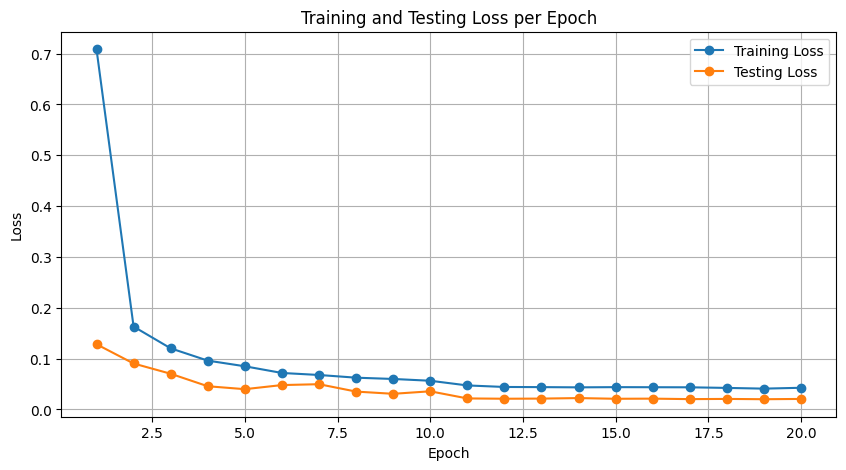

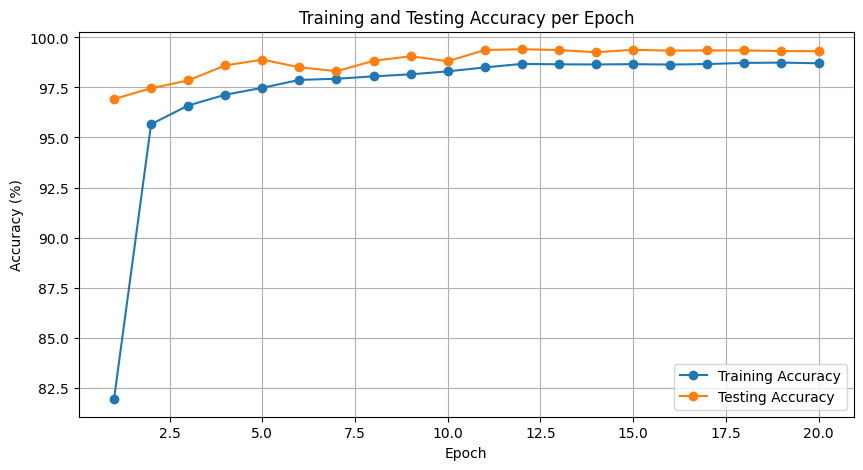

In [25]:
class RandomAugmentationOld:
    """Custom augmentation that randomly applies different transformations"""
    def __init__(self, p=0.7):
        self.p = p
        self.affine = transforms.RandomAffine(
            degrees=15,
            translate=(0.1, 0.1),
            scale=(0.9, 1.1),
            fill=0
        )
        self.rotate = transforms.RandomRotation(20, fill=0)

    def add_noise(self, img):
        """Add random Gaussian noise"""
        noise = torch.randn_like(img) * 0.1
        noisy_img = img + noise
        return torch.clamp(noisy_img, 0., 1.)

    def __call__(self, img):
        if random.random() > self.p:
            return img
        aug_type = random.choice(['affine', 'rotate', 'noise'])
        if aug_type == 'affine':
            return self.affine(img)
        elif aug_type == 'rotate':
            return self.rotate(img)
        else:
            return self.add_noise(img)

class RandomAugmentation:
    """
    Custom augmentation that randomly applies a sequence of transformations
    to grayscale images, such as MNIST digits.
    """
    def __init__(self, p=0.7):
        self.p = p  # Probability of applying any augmentation

        # Define all available individual transforms
        self.transforms_list = [
            # 1. Randomly rotate the image by a specified degree range
            transforms.RandomRotation(degrees=10),

            # 2. Apply random affine transformations (rotations, translations, scaling)
            transforms.RandomAffine(
                degrees=10,
                translate=(0.1, 0.1),  # Up to 10% translation
                scale=(0.9, 1.1),      # Scaling between 90% and 110%
                shear=10               # Shearing by 10 degrees
            ),

            # 3. Randomly shift the image by cropping a random portion
            transforms.RandomResizedCrop(
                size=28,  # Maintain the original image size for MNIST
                scale=(0.8, 1.0),
                ratio=(0.9, 1.1)
            ),

            # 4. Apply a random perspective transform
            transforms.RandomPerspective(distortion_scale=0.2, p=1.0),

            # 5. Simulate a change in brightness/contrast (effective even on grayscale)
            transforms.ColorJitter(brightness=0.2, contrast=0.2),

            # 6. Randomly erase a small portion of the image to force the model to learn from partial data
            transforms.RandomErasing(p=1.0, scale=(0.02, 0.1), ratio=(0.3, 3.3))
        ]

    def add_noise(self, img):
        """Add random Gaussian noise to a PyTorch tensor."""
        noise = torch.randn_like(img) * 0.1
        noisy_img = img + noise
        return torch.clamp(noisy_img, 0., 1.)

    def __call__(self, img):
        """Applies a random number of augmentations (1 or 2) from the list."""

        # With probability (1-p), return the original image
        if random.random() > self.p:
            return img

        # Randomly decide how many augmentations to apply (1 or 2)
        num_augmentations = random.randint(1, 2)

        # Select a random subset of transformations without replacement
        transforms_to_apply = random.sample(self.transforms_list, num_augmentations)

        # Add noise as a separate, potential augmentation, not a core choice
        if random.random() < 0.5: # 50% chance to also add noise
            transforms_to_apply.append(self.add_noise)

        # Apply the selected sequence of transformations
        for transform in transforms_to_apply:
            if callable(transform):
                img = transform(img)
            else:
                img = transform(img)

        return img




def train_one_epoch(model, train_loader, criterion, optimizer, device):
    """Trains the model for one epoch and returns loss and accuracy."""
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_samples_processed = 0

    # Wrap the train_loader with tqdm
    train_loader_tqdm = tqdm(train_loader, desc="Training", unit="batch")

    for data, target in train_loader_tqdm:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)
        _, predicted = torch.max(output.data, 1)

        # Update counters
        total_samples_processed += data.size(0)
        correct_preds += (predicted == target).sum().item()

        # Calculate real-time batch accuracy to display in tqdm
        if total_samples_processed > 0:
            current_accuracy = 100. * correct_preds / total_samples_processed
            train_loader_tqdm.set_postfix(loss=loss.item(), acc=f"{current_accuracy:.2f}%")

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = 100. * correct_preds / len(train_loader.dataset)
    return epoch_loss, epoch_accuracy

def test(model, test_loader, criterion, device):
    """Evaluates the model on the test set and returns loss and accuracy."""
    model.eval()
    test_loss = 0.0
    correct_preds = 0
    total_samples = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item() * data.size(0)
            pred = output.argmax(dim=1, keepdim=True)
            total_samples += target.size(0)
            correct_preds += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= total_samples
    test_accuracy = 100. * correct_preds / total_samples
    return test_loss, test_accuracy

def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies):
    epochs = range(1, len(train_losses) + 1)

    # Plotting Loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, test_losses, label='Testing Loss', marker='o')
    plt.title('Training and Testing Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig('loss_plot.png')
    plt.show()

    # Plotting Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(epochs, test_accuracies, label='Testing Accuracy', marker='o')
    plt.title('Training and Testing Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.savefig('accuracy_plot.png')
    plt.show()


def perform(epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("device", device)
    print("number of epochs", epochs)
    # Model, loss, and optimizer
    model = Network().to(device)
    print(f"Total number of parameters: {sum(p.numel() for p in model.parameters())}")

    summary(model, input_size=(1, 28, 28))

    # Data transformations
    transform_train = transforms.Compose([
        transforms.ToTensor(),
        RandomAugmentation(p=0.4),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Load datasets
    train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform_train)
    test_dataset = datasets.MNIST('data', train=False, download=True, transform=transform_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)



    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    # Lists to store metrics for plotting
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []


    # Training and testing loop
    for epoch in range(1, epochs + 1):
        print("-" * 50)
        print(f'Epoch {epoch}/{epochs}:')
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = test(model, test_loader, criterion, device)

        # Store metrics
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f'  Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%')
        print(f'  Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')
        print("-" * 50)
        scheduler.step()

    # Save the final model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    if not os.path.exists('models'):
        os.makedirs('models')
    torch.save(model.state_dict(), f'models/model_{timestamp}_acc{test_acc:.1f}.pth')
    print("Training finished and model saved.")

    plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies)

perform(epochs=20)

--- Dataset Information ---
Number of entries in the training dataset: 60000
Number of entries in the testing dataset: 10000
-------------------------


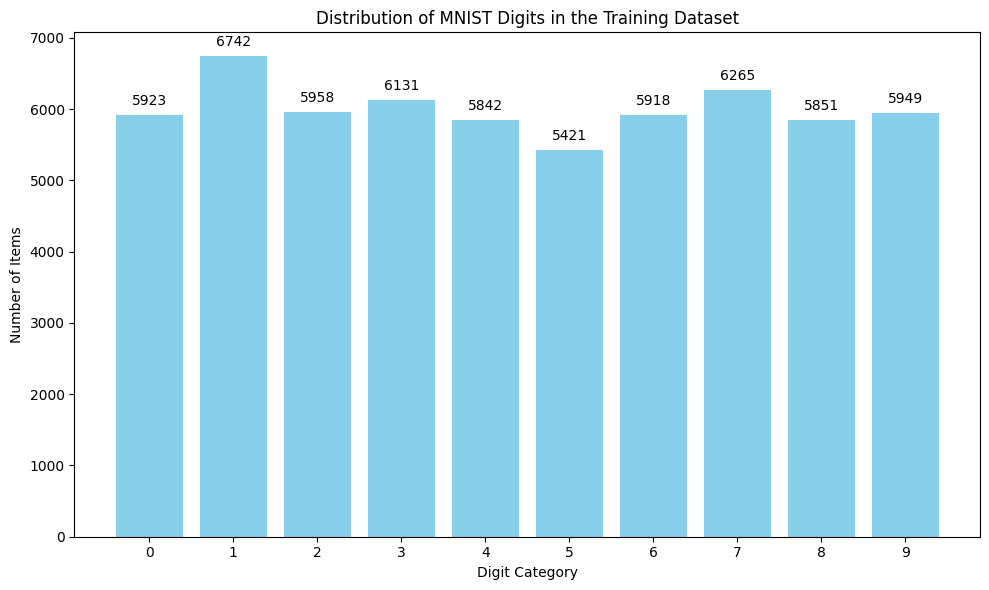

In [26]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the transformations for the datasets.
# We'll convert the images to tensors.
transform_train = transforms.ToTensor()
transform_test = transforms.ToTensor()

# Load the MNIST datasets. The 'download=True' argument will download the
# data if it is not already present in the 'data' directory.
train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform_train)
test_dataset = datasets.MNIST('data', train=False, download=True, transform=transform_test)

def analyze_and_plot_mnist():
    """
    Analyzes the MNIST dataset by printing the number of entries
    in the training and testing sets, and then plots a bar graph
    showing the distribution of items in the training dataset.
    """
    # --- Task 1: Print the number of data entries ---
    print("--- Dataset Information ---")
    print(f"Number of entries in the training dataset: {len(train_dataset)}")
    print(f"Number of entries in the testing dataset: {len(test_dataset)}")
    print("-" * 25)

    # --- Task 2: Plot a graph showing the number of items in each category ---

    # Count the number of samples for each digit (0-9) in the training dataset.
    # We use a defaultdict to simplify counting.
    category_counts = defaultdict(int)
    for _, label in train_dataset:
        category_counts[label] += 1

    # Extract the labels (0-9) and their corresponding counts.
    categories = sorted(category_counts.keys())
    counts = [category_counts[c] for c in categories]

    # Create the bar plot.
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')

    # Add labels and title for clarity.
    plt.xlabel("Digit Category")
    plt.ylabel("Number of Items")
    plt.title("Distribution of MNIST Digits in the Training Dataset")
    plt.xticks(categories)  # Ensure all digit labels are shown on the x-axis

    # Add text labels on top of each bar for the exact count.
    for i, count in enumerate(counts):
        plt.text(i, count + 100, str(count), ha='center', va='bottom')

    # Display the plot.
    plt.tight_layout()
    plt.show()

# Call the function to run the analysis and plotting
analyze_and_plot_mnist()
